The aim of this project is to gain a deeper understanding of how a hyperspectral pushbroom instrument performs.

Your task is to carefully read and analyze the information given in this folder, then recreate the following aspects of the pre-launch characterization:
In your recreation, you will need to apply mathematical formulas and models to calculate the instrument's performance metrics. 
You will also need to interpret the results and draw conclusions about the instrument's capabilities and limitations.

All referenced papers are included in the [Supporting Material] folder. In your recreation, you will be using an instrument known as HSI V4. 

This assignment aims to develop your skills in scientific research, data analysis, and problem-solving. By recreating the pre-launch characterization of the HYPSO-1 
hyperspectral imager, you will gain a deeper understanding of the challenges involved in designing and testing satellite instruments.

This Notebook is filled with a module to make a mock spectrogram so that you can test various things before going to the lab.


------
Some of the code you need to complete this project is provided as part of this reposiotory.
The code is developed using conda, and we recomend that you do the same.
Here is a step-by-step guide on how to install conda and create the desired environment.

**Installing Conda**

To get started, you'll need to install conda, which is a package manager for Python. You can do this by following these steps:

1. **For Windows**: Download the Anaconda installer from the official Anaconda website: <https://www.anaconda.com/products/individual>. Choose the "Custom" installation option and select only the "conda" component.
2. **For macOS (using Homebrew)**: Run the following command in your terminal: `brew install anaconda`
3. **For Linux**: You can install conda using a package manager like apt-get or yum, or by downloading the installer from the Anaconda website.

**Creating an Environment**

Once you have installed conda, you can create a new environment to isolate your Python packages and dependencies. Here's how:

1. Open a terminal or command prompt.
2. Type `conda create env -f <path-to-"envirnoment.yml">`
3. Activate the environment by typing `conda activate ttk4265`.
4. You should now see `(ttk4265)` at the beginning of your command prompt, indicating that you are working within the newly created environment.
5. The packages you need should be included then
6. To install other packages or dependencies, use the `conda install` command followed by the package name (e.g., `conda install numpy`).
7. When you're finished working in this environment, deactivate it by typing `conda deactivate`.

In [96]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

from scipy.signal import find_peaks

In [97]:
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Test code to display Hyperspectral images

# # base_folder = r'C:\Users\ariaa\Documents\!PhD\Optisk Fjernmåling\TTK4265-assignment1-group1-data'
# # base_folder = r'C:\Users\ariaa\OneDrive - NTNU\!PhD\Optisk Fjernmåling\Optikklab\Code\Assignment_1\Data'
# base_folder = './Data/Ar'
# file_name1 =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
# file_name2 =  '1727163193.770_00002_e999.8941_g008_1936x1216.bip'
# file_path1 = os.path.join(base_folder, file_name1)
# file_path2 = os.path.join(base_folder, file_name2)
# base_folder = './Data/Hg'
# file_name3 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
# file_name4 =  '1727162666.802_00001_e999.8941_g017_1936x1216.bip'
# file_path3 = os.path.join(base_folder, file_name3)
# file_path4 = os.path.join(base_folder, file_name4)

# # file_path1 = 'C:/Users/ariaa/Documents/!PhD/Optisk Fjernmåling/TTK4265-assignment1-group1-data/Ar/1727163191.770_00000_e999.8941_g008_1936x1216.bip'
# # file_path3 = 'C:/Users/ariaa/Documents/!PhD/Optisk Fjernmåling/TTK4265-assignment1-group1-data/Ar/1727163193.770_00002_e999.8941_g008_1936x1216.bip'
        
# datacube1 = np.fromfile(file_path1, dtype='uint16')
# datacube2 = np.fromfile(file_path2, dtype='uint16')
# datacube3 = np.fromfile(file_path3, dtype='uint16')
# datacube4 = np.fromfile(file_path4, dtype='uint16')

# # Reshape datacube.
# samples = 1
# bands = 1936
# datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]
# datacube2 = datacube2.reshape((-1, samples, bands))[:,0,::-1]
# datacube3 = datacube3.reshape((-1, samples, bands))[:,0,::-1]
# datacube4 = datacube4.reshape((-1, samples, bands))[:,0,::-1]

# plt.imshow(datacube1)
# plt.figure()
# plt.imshow(datacube2)
# plt.figure()
# plt.imshow(datacube3)
# plt.figure()
# plt.imshow(datacube4)

# # C:\\Users\\ariaa\\OneDrive - NTNU\\!PhD\\Optisk Fjernmåling\\Code\\Assignment_1\\Data\\Ar\\1727163193.770_00002_e999.8941_g008_1936x1216.bip


# Radiometric Calibration - Aria

Questions: 
- was the W of the lamp 100W? and what is then the  [mW/(m^2 nm sr)]
- is exposure time in ms?
- seems that the dark images we have taken have diff exposure time then the radiometric images, what to do?
- Is the output value of the radiometric images in counts?
- When calculating the Spectral calibration RMSE, dont we need the actual spectral lines of Ar and Hg? 

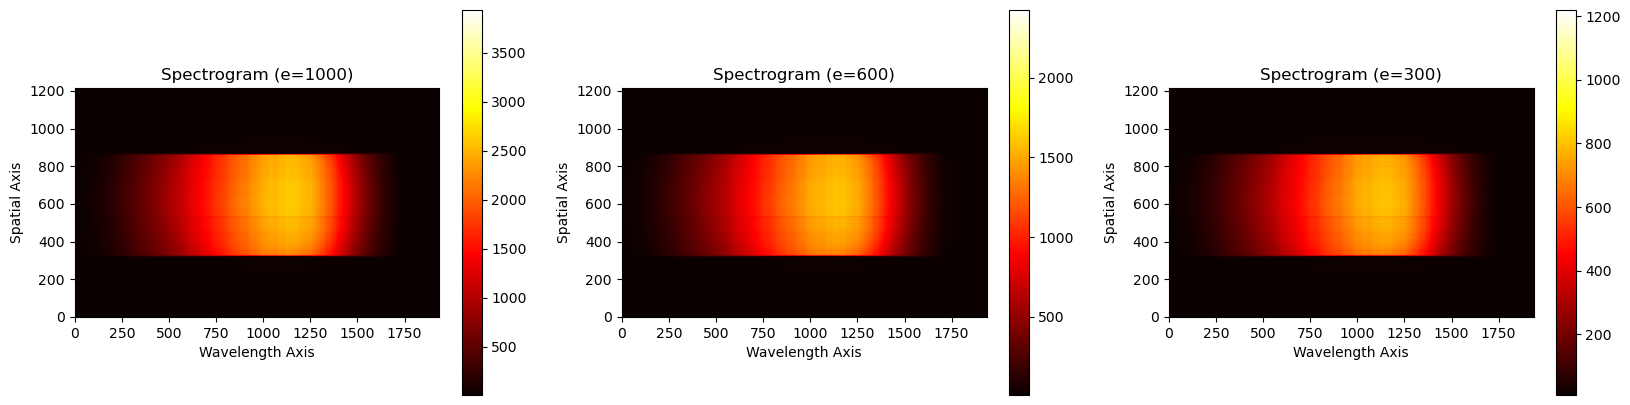

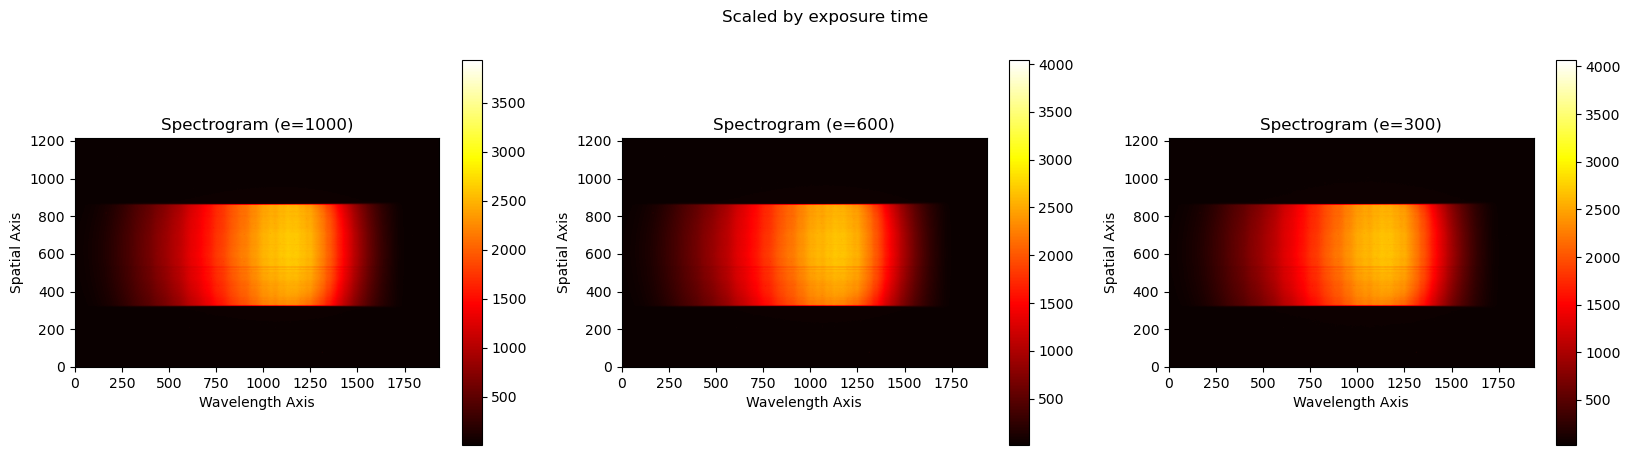

In [98]:
# take avg. image for each exposure


base_folder = r'.\Data\radiometric'
file_list = glob.glob(os.path.join(base_folder, '*'))

samples = 1
bands = 1936
datacube = np.fromfile(file_list[0], dtype='uint16')
avg_cube_e1000 = np.zeros_like(datacube) # init. empty empty average datacube
avg_cube_e600 = np.zeros_like(datacube) # init. empty empty average datacube
avg_cube_e300 = np.zeros_like(datacube) # init. empty empty average datacube

# make avg. image for e=1000
for file in file_list[:10]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e1000 += datacube
avg_cube_e1000 = avg_cube_e1000/10
avg_cube_e1000 = avg_cube_e1000.reshape((-1, samples, bands))[:,0,::-1]

# make avg. image for e=600
for file in file_list[10:20]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e600 += datacube
avg_cube_e600 = avg_cube_e600/10
avg_cube_e600 = avg_cube_e600.reshape((-1, samples, bands))[:,0,::-1]

# make avg. image for e=300
for file in file_list[20:30]:
    # print(file)
    datacube = np.fromfile(file, dtype='uint16')
    avg_cube_e300 += datacube
avg_cube_e300 = avg_cube_e300/10
avg_cube_e300 = avg_cube_e300.reshape((-1, samples, bands))[:,0,::-1]

# Visualize output-
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(avg_cube_e1000, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=1000)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,2)
plt.imshow(avg_cube_e600, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=600)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,3)
plt.imshow(avg_cube_e300, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


# Visualize normalized output
plt.figure(figsize=(20,5))
plt.suptitle('Scaled by exposure time')
plt.subplot(1,3,1)
plt.imshow(avg_cube_e1000/1, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=1000)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,2)
plt.imshow(avg_cube_e600/0.6, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=600)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()

plt.subplot(1,3,3)
plt.imshow(avg_cube_e300/0.3, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


K = LS <br>
L = 100

### Find edges in image

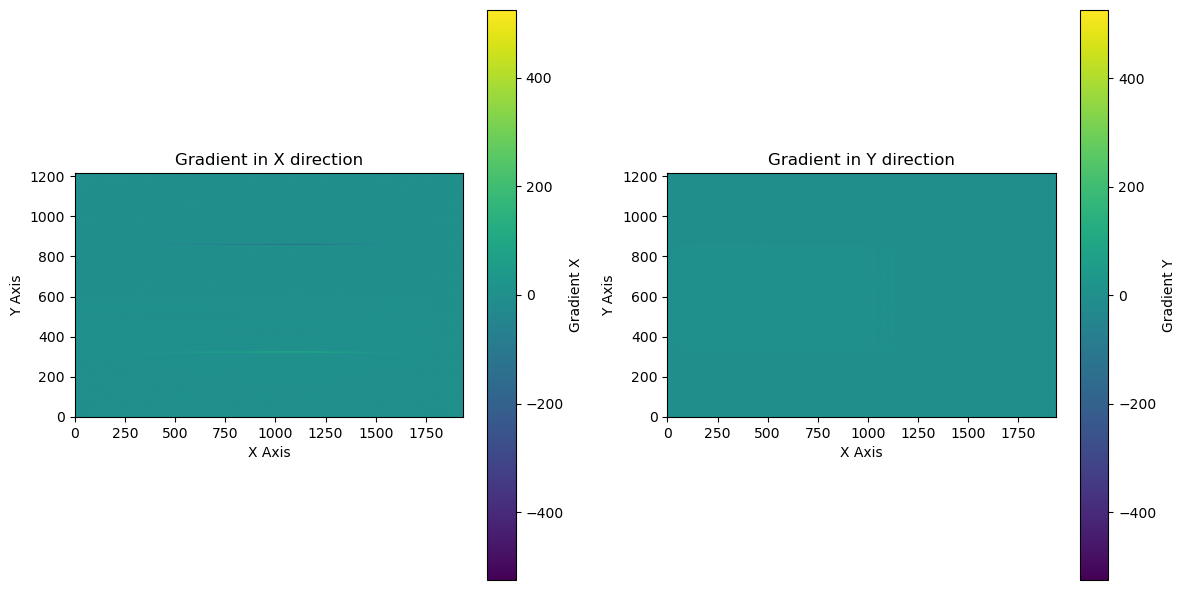

Edge at: 323 and 860


In [99]:
# Find where the edges in the image are
gradient_x, gradient_y = np.gradient(avg_cube_e300)

# Visualize the gradients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gradient_x, cmap='viridis', origin='lower')
plt.colorbar(label='Gradient X')
plt.title('Gradient in X direction')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.subplot(1, 2, 2)
plt.imshow(gradient_y, cmap='viridis', origin='lower')
plt.colorbar(label='Gradient Y')
plt.title('Gradient in Y direction')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.tight_layout()
plt.show()

print(f'Edge at: {np.argmax(gradient_x[:,1000])} and {np.argmin(gradient_x[:,1000])}')

### Calculate K

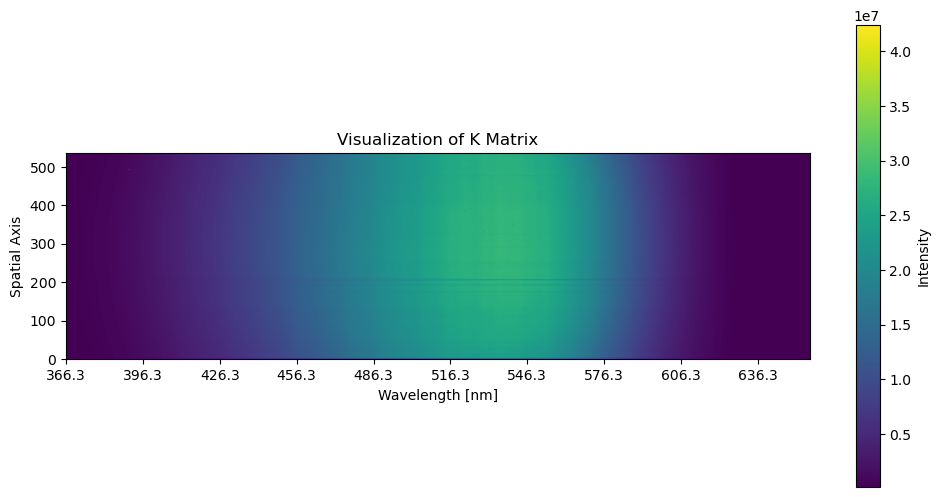

In [100]:
# calculate the K's
edge1=323 
edge2=860 
# L = 100
L = 16777.6

avg_avg_cube = 1/3 * (avg_cube_e300 + avg_cube_e600 + avg_cube_e1000)
K = avg_avg_cube[edge1:edge2,:] * L

# Visualize the matrix K
plt.figure(figsize=(12, 6))
plt.imshow(K, cmap='viridis', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Visualization of K Matrix')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spatial Axis')
x_ticks = np.arange(0, bands, 200)  # Custom tick locations
x_labels = 366.3 + x_ticks * 0.15  # Custom tick labels
plt.xticks(ticks=x_ticks, labels=np.round(x_labels, 2))
plt.show()

### Verify coefficients

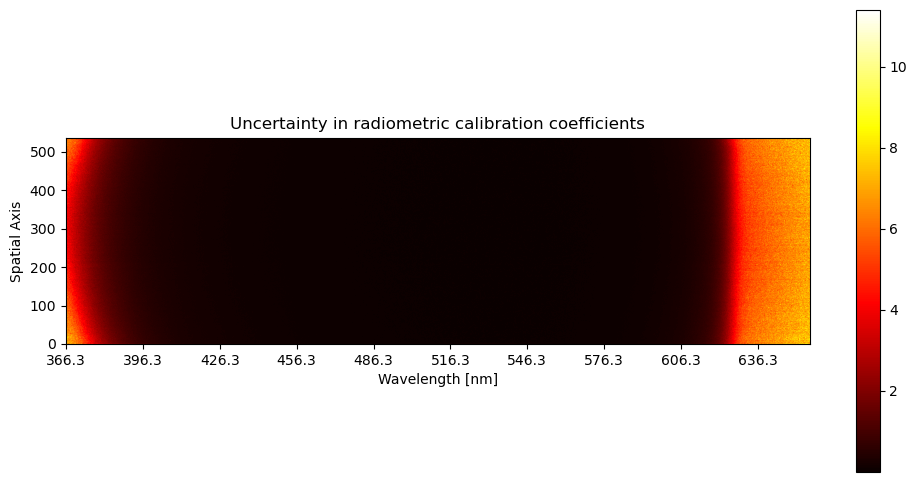

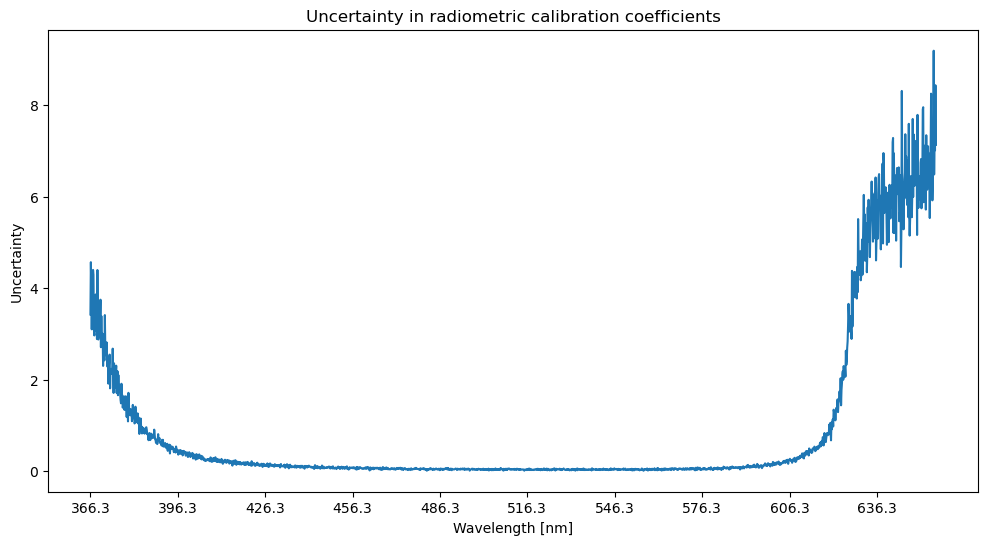

In [101]:
# verify coefficients

base_folder = r'.\Data\radiometric-verify'
file_list = glob.glob(os.path.join(base_folder, '*'))

samples = 1
bands = 1936
datacube = np.fromfile(file_list[0], dtype='uint16')
datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1]
avg_cube = np.zeros_like(datacube).astype(float) # init. empty empty average datacube

exposures = [20, 40, 60, 80, 100, 200, 400, 600, 800, 1000]

for i in range(10):
    datacube = np.fromfile(file_list[i+1], dtype='uint16')
    datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1]
    avg_cube += 1/10 * datacube / (exposures[i]/1000)
# avg_cube = avg_cube.reshape((-1, samples, bands))[:,0,::-1]

avg_L = K/avg_cube
img_L = K/datacube

uncertainty = np.abs( (avg_L-img_L)/avg_L) # equation from lab doc. 

x_ticks = np.arange(0, bands, 200)  # Custom tick locations
x_labels = 366.3 + x_ticks * 0.15  # Custom tick labels

plt.figure(figsize=(12,6))
plt.imshow(uncertainty, cmap='hot', origin='lower')
plt.colorbar()
plt.title('Uncertainty in radiometric calibration coefficients')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spatial Axis')
plt.xticks(ticks=x_ticks, labels=np.round(x_labels, 2))
plt.show()

plt.figure(figsize=(12,6))
plt.plot(uncertainty[300])
plt.title('Uncertainty in radiometric calibration coefficients')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Uncertainty')
plt.xticks(ticks=x_ticks, labels=np.round(x_labels, 2))
plt.show()

# Spectral Calibration

## Base code:

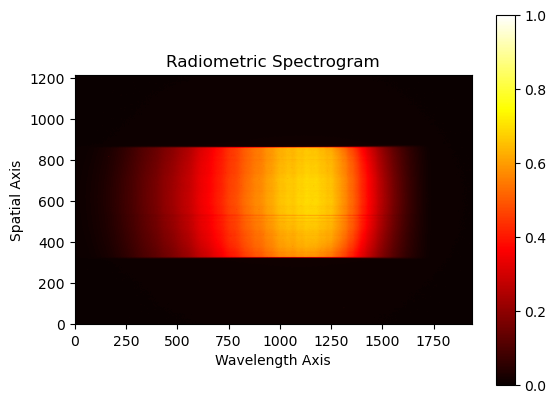

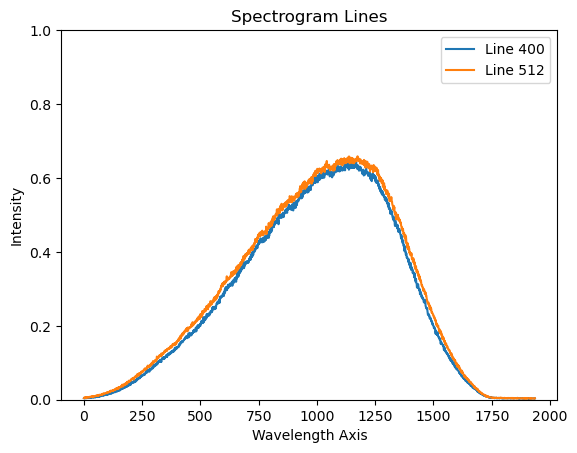

In [102]:

# from mock import create_fake_spectrogram
# from mock import save_spectrogram_as_png


base_folder = r'.\Data\radiometric'
file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))

plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Radiometric Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'uniform_mock_spectrogram.png')
# save_spectrogram_as_png(spectrogram, filename)

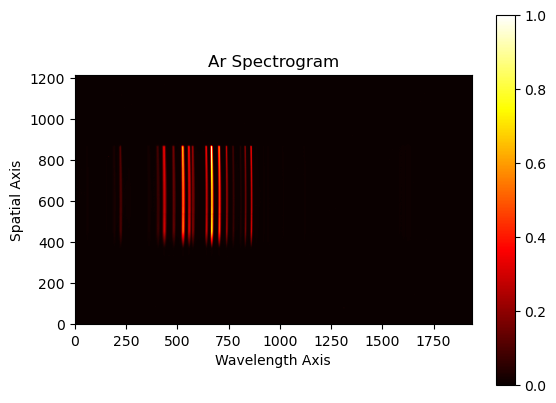

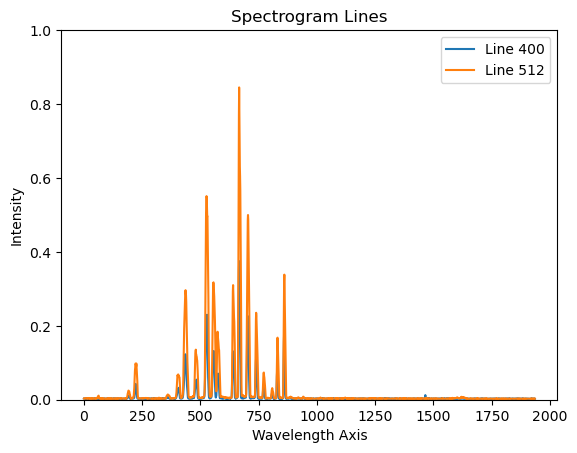

In [103]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/Ar'
file_name1 =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))


plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Ar Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

## Do exercises:

### Emission lines Ar and Hg side by side

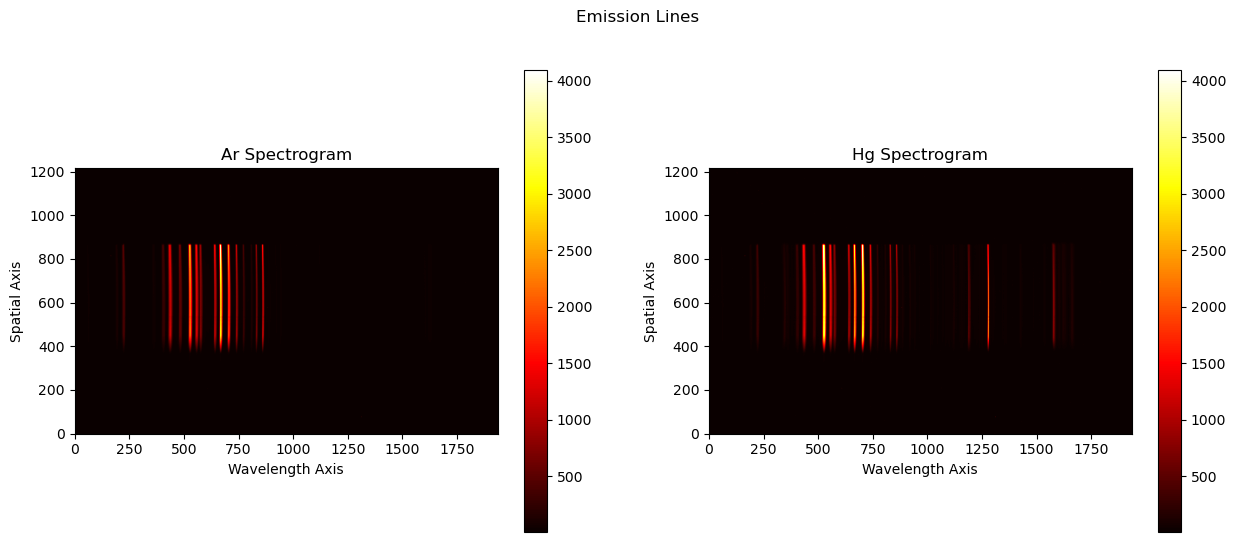

In [104]:
base_folder = './Data/Ar'
file_name1 =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)
# get datacube
datacube_ar = np.fromfile(file_path1, dtype='uint16')
# Reshape datacube.
samples = 1
bands = 1936
datacube_ar = datacube_ar.reshape((-1, samples, bands))[:,0,::-1]


base_folder = './Data/Hg'
file_name1 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)
# get datacube
datacube_hg = np.fromfile(file_path1, dtype='uint16')
# Reshape datacube.
samples = 1
bands = 1936
datacube_hg = datacube_hg.reshape((-1, samples, bands))[:,0,::-1]


# datacube_ar = datacube_ar/(np.max(datacube_ar)-np.min(datacube_ar))

plt.figure(figsize=(15,6))
plt.suptitle('Emission Lines')
plt.subplot(1,2,1)
plt.imshow(datacube_ar, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Ar Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')

plt.subplot(1,2,2)
plt.imshow(datacube_hg, cmap='hot', origin='lower')
plt.colorbar()
# plt.clim(0, 1)
plt.title('Hg Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

### Argon(Ar)

[0.28973105 0.300489   0.31540342 0.3195599  0.47261614 0.53276284
 0.79144254]


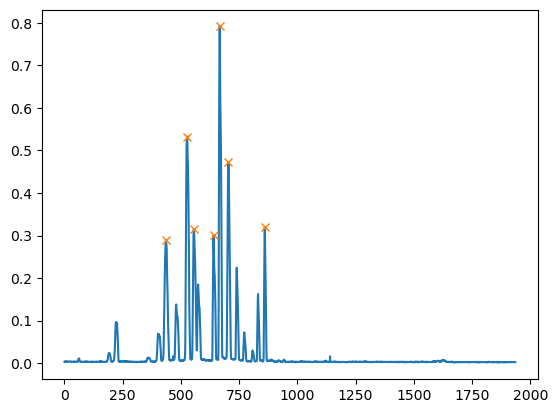

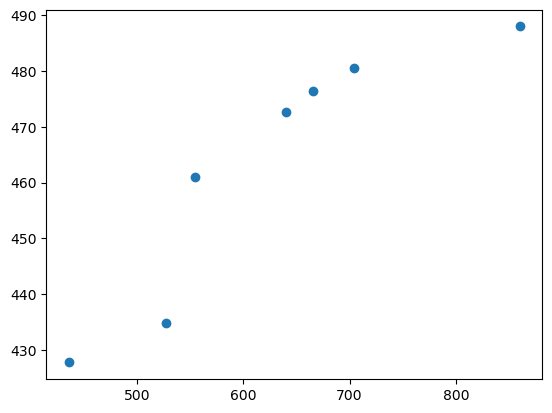

In [105]:
argon_wavelengths = np.array([4277.528, 4348.064, 4609.567, 4726.868, 4764.865, 4806.020, 4879.864])/10 # divide by 10 since it is given in Å

num_peaks = argon_wavelengths.shape[0]

peaks, _ = find_peaks(datacube1[600]) # 

plt.plot(datacube1[600])#
# plt.plot(peaks, datacube1[600][peaks], "x")

peak_array = datacube1[600][peaks]

peak_values = np.partition(peak_array, -num_peaks)[-num_peaks:]
print(np.partition(peak_array, -num_peaks)[-num_peaks:])

# for point in datacube1[600]: if point in peak_values: print(point)
final_points = []
for i in range(len(datacube1[600])):
    if datacube1[600][i] in peak_values and i in peaks: 
        final_points.append(i)

# del final_points[4]

plt.plot(final_points, datacube1[600][final_points], "x")

plt.figure()
plt.scatter(final_points, argon_wavelengths)


Coefficients: [0.15433106]
Intercept: 366.2961291158603
Root Mean squared error (Linear):      8.83
Root Mean squared error (Poly2):       5.93
Root Mean squared error (Poly3):       5.38
Root Mean squared error (Ridge Poly2): 5.93


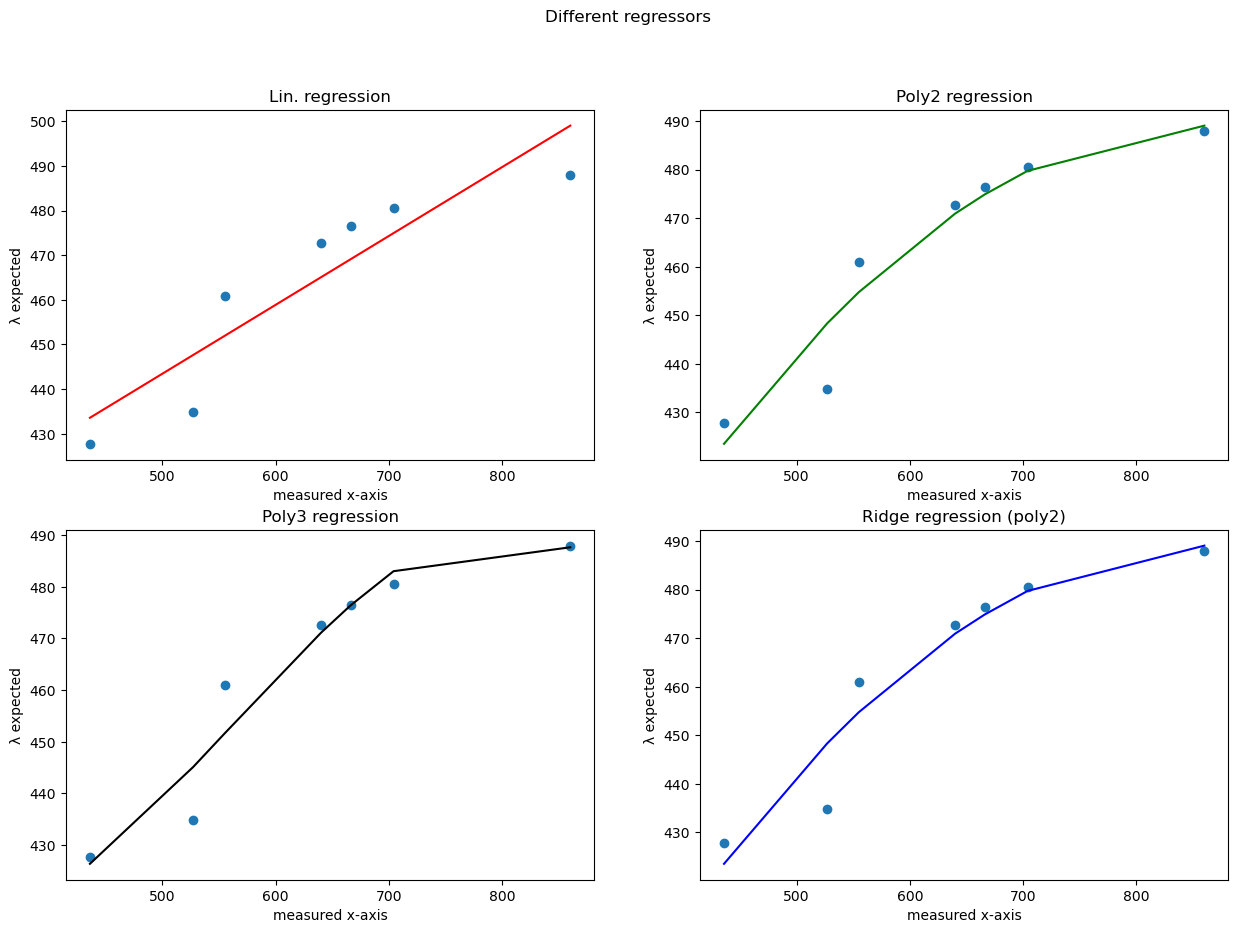

In [106]:
from useful_functions import *
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

x = np.array(final_points).reshape(-1,1)
y = np.array(argon_wavelengths)

model = LinearRegression().fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# y_pred = plynominal_model(2,observed_wavelengths, argon_wavelengths)

# y_pred = np.arange(300,1000)*model.coef_ + model.intercept_
y_pred = model.predict(x)

# Polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred_poly2 = model.predict(x_poly)

# Polynomial (degree 3)
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred_poly3 = model.predict(x_poly)

# Ridge Regression (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
ridge_model = Ridge(alpha=1.0).fit(x_poly, y)
y_pred_ridge_poly2 = ridge_model.predict(x_poly)

# Plot the results
plt.figure(figsize=(15,10))
plt.suptitle('Different regressors')
plt.subplot(2,2,1)
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
# plt.legend(['Data', 'Linear'])
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.title('Lin. regression')
plt.subplot(2,2,2)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_poly2, 'g')
# plt.legend(['Data', 'Poly2'])
plt.title('Poly2 regression')
plt.subplot(2,2,3)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_poly3, color='black')
# plt.legend(['Data', 'Poly3', ])
plt.title('Poly3 regression')
plt.subplot(2,2,4)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_ridge_poly2, 'b')
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
# plt.legend(['Data', 'Ridge Poly2'])
plt.title('Ridge regression (poly2)')

# Print mean squared errors
print("Root Mean squared error (Linear):      %.2f" % np.sqrt(mean_squared_error(y, y_pred)))
print("Root Mean squared error (Poly2):       %.2f" % np.sqrt(mean_squared_error(y, y_pred_poly2)))
print("Root Mean squared error (Poly3):       %.2f" % np.sqrt(mean_squared_error(y, y_pred_poly3)))
print("Root Mean squared error (Ridge Poly2): %.2f" % np.sqrt(mean_squared_error(y, y_pred_ridge_poly2)))

plt.show()


### Mercury(Hg)

Do Mercury spectral calibration 

[ 978 1284 1061 1299 3362 2563 3375 2489]


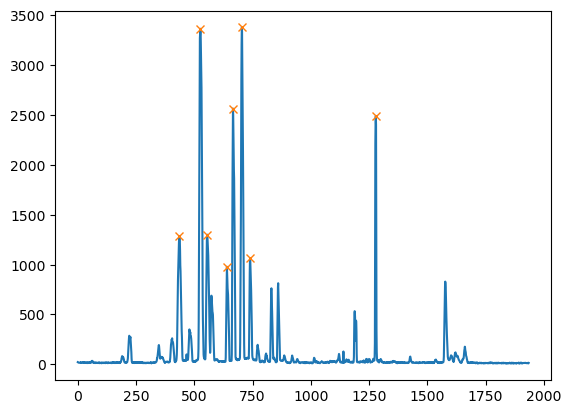

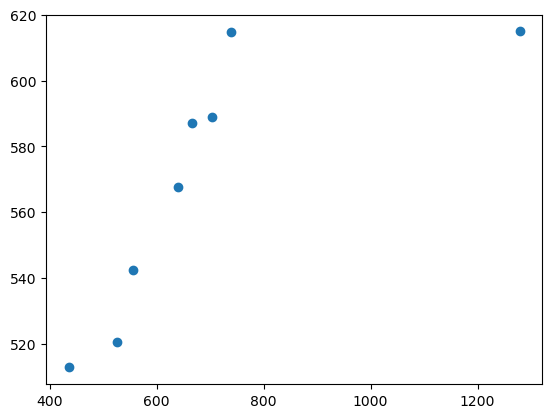

In [107]:
mercury_wavelengths =  np.array([ 5128.442, 5204.768, 5425.253, 5677.105, 5871.279,  5888.939, 6146.435, 6149.475])/10

base_folder = './Data/Hg'
file_name1 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube_hg = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube_hg = datacube_hg.reshape((-1, samples, bands))[:,0,::-1]

num_peaks = mercury_wavelengths.shape[0]

peaks, _ = find_peaks(datacube_hg[600])
# print(peaks)

plt.plot(datacube_hg[600])#[500:600])
# plt.plot(peaks, datacube_hg[600][peaks], "x")

peak_array = datacube_hg[600][peaks]

peak_values = np.partition(peak_array, -num_peaks)[-num_peaks:]
print(np.partition(peak_array, -num_peaks)[-num_peaks:])

# for point in datacube_hg[600]: if point in peak_values: print(point)
final_points = []
for i in range(len(datacube_hg[600])):
    if datacube_hg[600][i] in peak_values and i in peaks: 
        final_points.append(i)

# del final_points[4]

plt.plot(final_points, datacube_hg[600][final_points], "x")

plt.figure()
plt.scatter(final_points, mercury_wavelengths)


Coefficients: [0.11912403]
Intercept: 486.0485762219613
Root Mean squared error (Linear):      23.91
Root Mean squared error (Poly2):       9.60
Root Mean squared error (Poly3):       5.09
Root Mean squared error (Ridge Poly2): 9.60


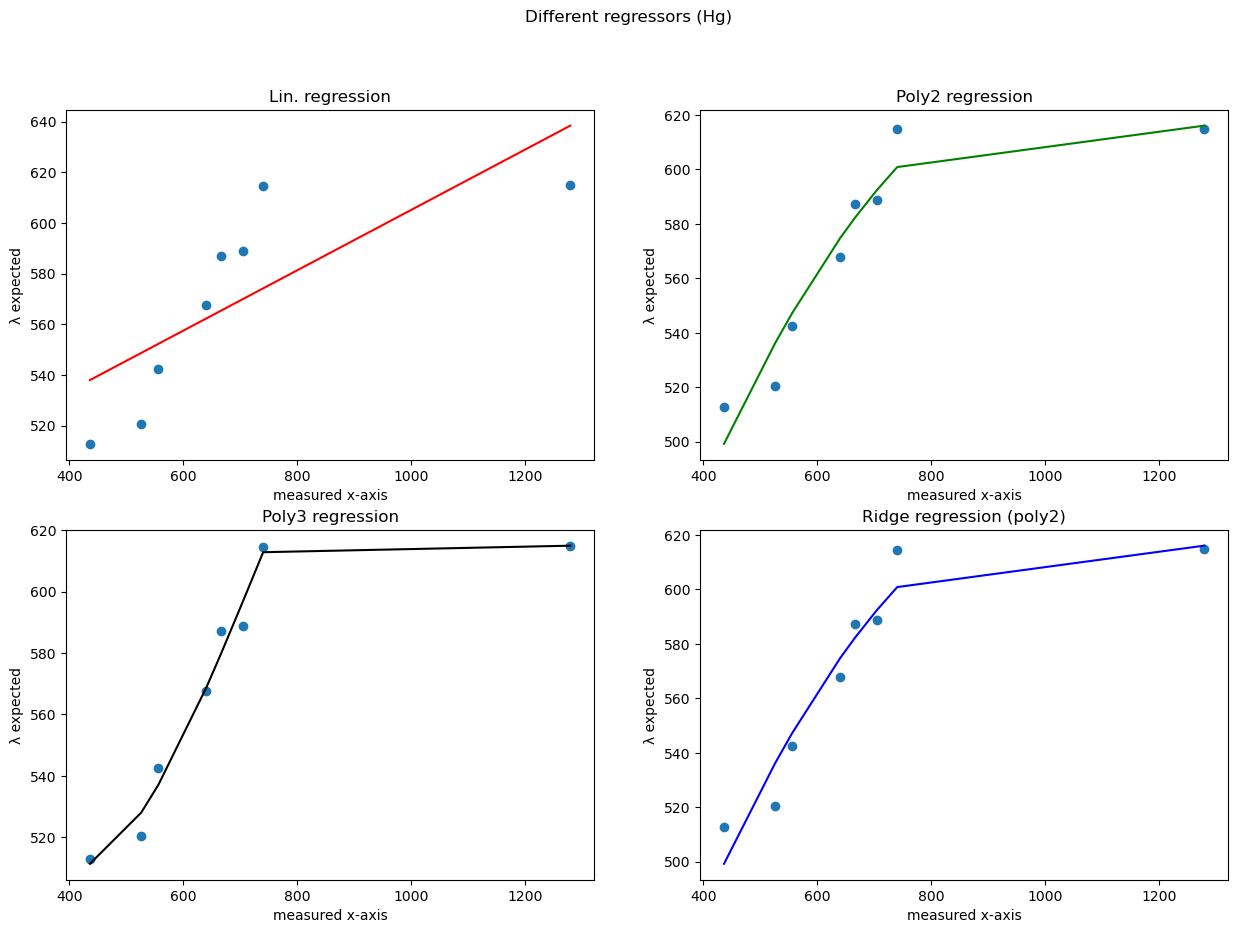

In [108]:
from useful_functions import *
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

x = np.array(final_points).reshape(-1,1)
y = np.array(mercury_wavelengths)

model = LinearRegression().fit(x, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# y_pred = plynominal_model(2,observed_wavelengths, argon_wavelengths)

# y_pred = np.arange(300,1000)*model.coef_ + model.intercept_
y_pred = model.predict(x)

# Polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred_poly2 = model.predict(x_poly)

# Polynomial (degree 3)
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
model = LinearRegression().fit(x_poly, y)
y_pred_poly3 = model.predict(x_poly)

# Ridge Regression (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
ridge_model = Ridge(alpha=1.0).fit(x_poly, y)
y_pred_ridge_poly2 = ridge_model.predict(x_poly)

# Plot the results
plt.figure(figsize=(15,10))
plt.suptitle('Different regressors (Hg)')
plt.subplot(2,2,1)
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
# plt.legend(['Data', 'Linear'])
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.title('Lin. regression')
plt.subplot(2,2,2)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_poly2, 'g')
# plt.legend(['Data', 'Poly2'])
plt.title('Poly2 regression')
plt.subplot(2,2,3)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_poly3, color='black')
# plt.legend(['Data', 'Poly3', ])
plt.title('Poly3 regression')
plt.subplot(2,2,4)
plt.scatter(x, y)
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
plt.plot(x, y_pred_ridge_poly2, 'b')
plt.xlabel('measured x-axis')
plt.ylabel('λ expected')
# plt.legend(['Data', 'Ridge Poly2'])
plt.title('Ridge regression (poly2)')

# Print mean squared errors
print("Root Mean squared error (Linear):      %.2f" % np.sqrt(mean_squared_error(y, y_pred)))
print("Root Mean squared error (Poly2):       %.2f" % np.sqrt(mean_squared_error(y, y_pred_poly2)))
print("Root Mean squared error (Poly3):       %.2f" % np.sqrt(mean_squared_error(y, y_pred_poly3)))
print("Root Mean squared error (Ridge Poly2): %.2f" % np.sqrt(mean_squared_error(y, y_pred_ridge_poly2)))

plt.show()


# Noise stuff?

In [109]:
# Extract the y-values from the datacube1 at index 600
y_values = datacube1[600]
positions = np.argpartition(y_values, -10)[-10:]

# Get the 10 largest values
largest_y_values = np.partition(y_values, -10)[-10:]

# Sort the values in descending order
largest_y_values = np.sort(largest_y_values)[::-1]

# Create a new array with these values
largest_y_values_array = np.array(largest_y_values)

print(largest_y_values_array)
print(positions)

[0.79144254 0.78239609 0.699022   0.69022005 0.6207824  0.58141809
 0.57334963 0.5594132  0.53276284 0.53178484]
[526 527 671 664 670 669 668 665 667 666]


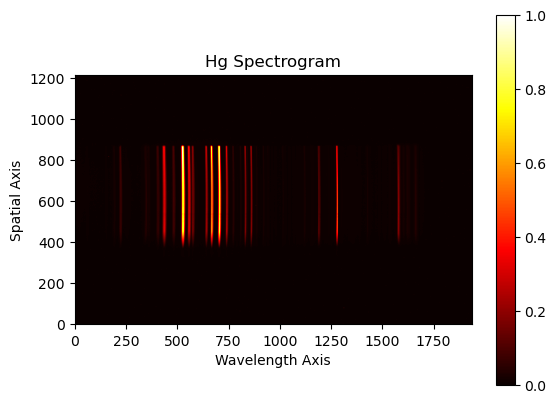

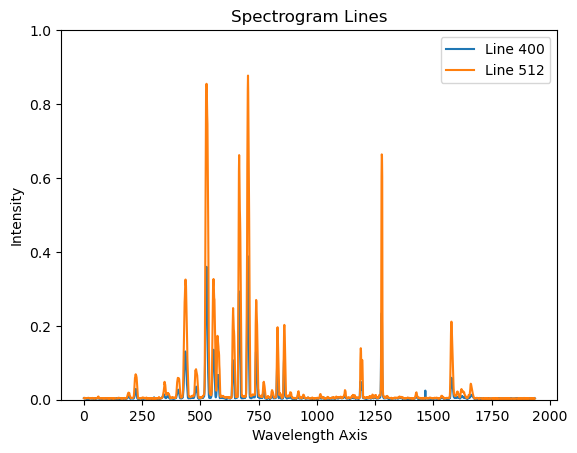

In [110]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/Hg'
file_name1 =  '1727162665.802_00000_e999.8941_g017_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = datacube1/(np.max(datacube1)-np.min(datacube1))


plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Hg Spectrogram')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()

# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

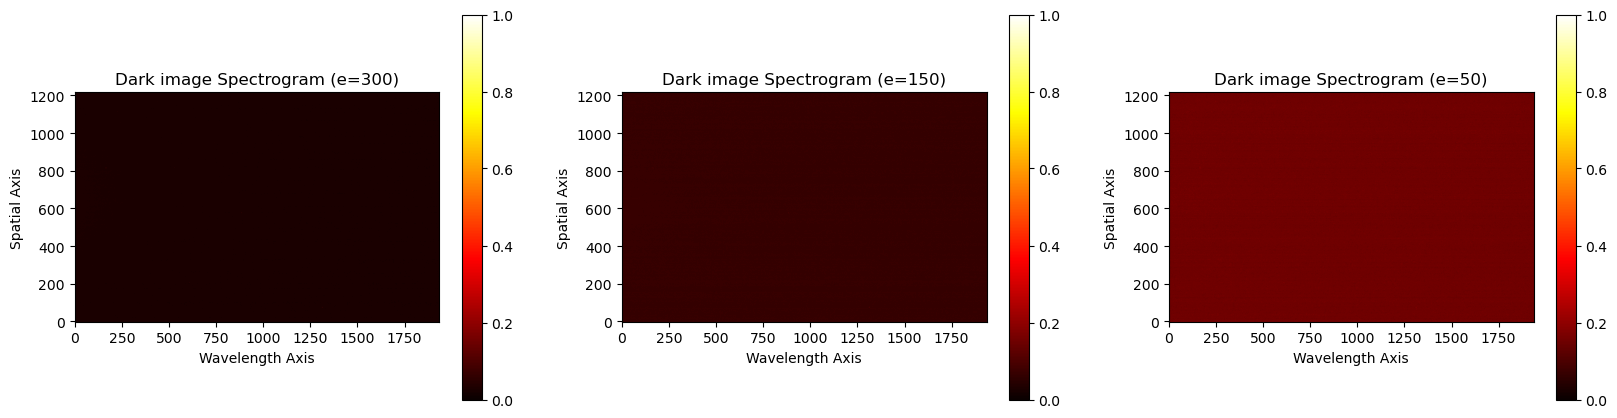

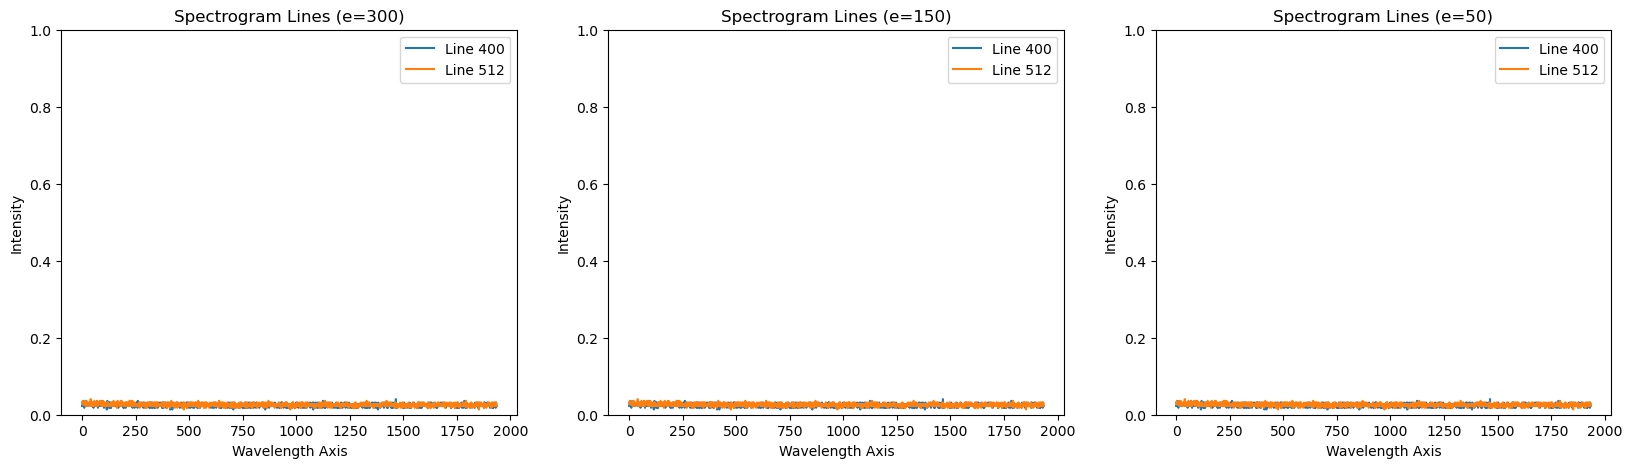

In [111]:
# spectral_lines_list = [
#     # index, amplitude, and FWHM
#     (100, 0.3, 5),
#     (312, 0.6, 3),
#     (700, 0.8, 2),
# ]

# spectrogram = create_fake_spectrogram(1024, 1024, 
#                                       profile="stripes", 
#                                       smile=True, vignetting=False, 
#                                       noise=False, 
#                                       spectral_lines=spectral_lines_list)

# base_folder = r'.\Data\radiometric'
# file_name1 =  '1727165717.971_00000_e999.8941_g000_1936x1216.bip'
base_folder = './Data/dark-images'
file_name1 =  '1727161965.569_00000_e300.0016_g000_1936x1216.bip'
file_name2 =  '1727162016.993_00000_e150.0014_g000_1936x1216.bip'
file_name3 =  '1727162044.101_00000_e049.9971_g000_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)
file_path2 = os.path.join(base_folder, file_name2)
file_path3 = os.path.join(base_folder, file_name3)

datacube1 = np.fromfile(file_path1, dtype='uint16')
datacube2 = np.fromfile(file_path2, dtype='uint16')
datacube3 = np.fromfile(file_path3, dtype='uint16')

# Reshape datacube.
samples = 1
bands = 1936
datacube1 = datacube1.reshape((-1, samples, bands))[:,0,::-1]
datacube2 = datacube2.reshape((-1, samples, bands))[:,0,::-1]
datacube3 = datacube3.reshape((-1, samples, bands))[:,0,::-1]

# spectrogram = create_fake_spectrogram(1024, 1024, profile="uniform", smile=True, vignetting=False, noise=True)
datacube1 = (datacube1 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))
datacube2 = (datacube2 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))
datacube3 = (datacube3 - np.min([datacube1, datacube2, datacube3]))/(np.max([datacube1, datacube2, datacube3])-np.min([datacube1, datacube2, datacube3]))

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(datacube1, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()
plt.subplot(1,3,2)
plt.imshow(datacube2, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=150)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
# plt.show()
plt.subplot(1,3,3)
plt.imshow(datacube3, cmap='hot', origin='lower')
plt.colorbar()
plt.clim(0, 1)
plt.title('Dark image Spectrogram (e=50)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.show()


plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=300)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
# plt.show()
plt.subplot(1,3,2)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=150)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
# plt.show()
plt.subplot(1,3,3)
# plt.plot(datacube1[100])
plt.plot(datacube1[400])
plt.plot(datacube1[512])
# plt.legend(['Line 100', 'Line 512'])
plt.legend(['Line 400', 'Line 512'])
plt.ylim(0, 1)
plt.title('Spectrogram Lines (e=50)')
plt.xlabel('Wavelength Axis')
plt.ylabel('Intensity')
plt.show()

if not os.path.exists('Data'):
    os.makedirs('Data')

# filename = os.path.join('Data', 'striped_mock_spectrogram.png')
# save_spectrogram_as_png(datacube1, filename)

In [112]:
np.max(datacube1), np.max(datacube2), np.max(datacube3), np.min([datacube1, datacube2, datacube3])

(np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.0))

((array([2.354149e+06, 1.700000e+01, 5.000000e+00, 2.000000e+00,
         0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
         0.000000e+00, 2.000000e+00]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 (array([2.354138e+06, 2.500000e+01, 8.000000e+00, 2.000000e+00,
         0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 2.000000e+00]),
  array([0.03125 , 0.128125, 0.225   , 0.321875, 0.41875 , 0.515625,
         0.6125  , 0.709375, 0.80625 , 0.903125, 1.      ]),
  <BarContainer object of 10 artists>),
 (array([2.197763e+06, 1.563880e+05, 1.300000e+01, 4.000000e+00,
         3.000000e+00, 2.000000e+00, 0.000000e+00, 1.000000e+00,
         1.000000e+00, 1.000000e+00]),
  array([0.07272727, 0.16545455, 0.25818182, 0.35090909, 0.44363636,
         0.53636364, 0.62909091, 0.72181818, 0.81454545, 0.90727273,
         1.        ]),
  <BarContainer object of 10 artists>))

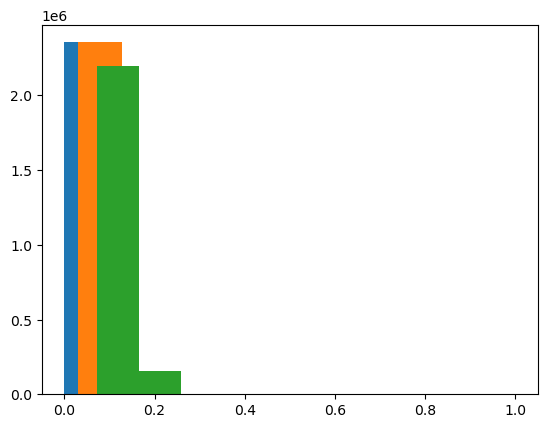

In [113]:
plt.hist(datacube1.flatten()), plt.hist(datacube2.flatten()), plt.hist(datacube3.flatten())

# Sensor Noise

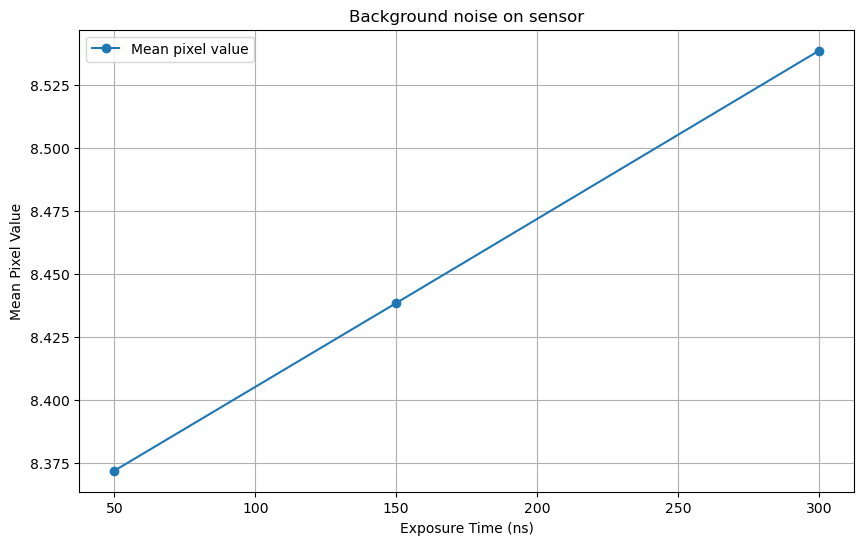

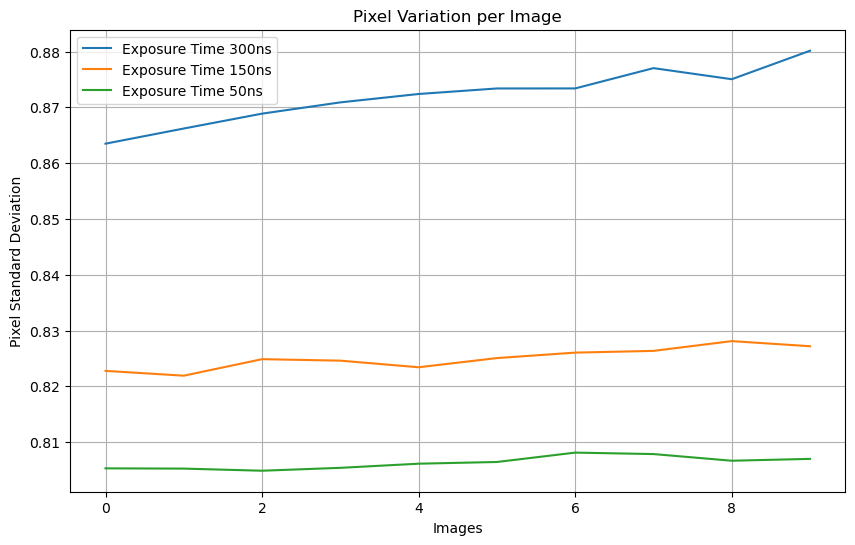

In [114]:
base_folder = r'.\Data\dark-images'
file_list = glob.glob(os.path.join(base_folder, '*'))

def get_empty_cube(file_list):
    datacube = np.fromfile(file_list[0], dtype='uint16')
    empty_cube = np.zeros_like(datacube, dtype=np.float64)  # Initialize empty cube
    return empty_cube

def get_the_mean(file_list, start, stop):
    empty_cube = get_empty_cube(file_list)  # Initialize the average cube
    dark_images = []  
    
    # Loop through the selected images to compute the average
    for file in file_list[start:stop]:
        datacube = np.fromfile(file, dtype='uint16')
        empty_cube += datacube  # Accumulate pixel values
        dark_images.append(datacube)  # Store individual image
        
    avg_cube = empty_cube / (stop - start)  # Divide by the number of images to get the average
    samples = 1
    bands = 1936
    avg_cube = avg_cube.reshape((-1, samples, bands))[:, 0, ::-1]  # Reshape correctly
    return avg_cube, dark_images

def std_dark_images(images):
    std_devs = []
    
    for img in images:
        std_val = np.std(img)  # Standard deviation of the pixel values in the image
        std_devs.append(std_val)
    
    return std_devs

def plot_the_mean_vs_exposure(exposure_times, means):
    plt.figure(figsize=(10, 6))
    plt.plot(exposure_times, means, 'o-', label='Mean pixel value')
    plt.xlabel('Exposure Time (ns)')
    plt.ylabel('Mean Pixel Value')
    plt.title('Background noise on sensor')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_pixel_variation(exposure_times, std_devs_list):
    plt.figure(figsize=(10, 6))
    for std_devs, exp_time in zip(std_devs_list, exposure_times):
        plt.plot(std_devs, label=f'Exposure Time {exp_time}ns')
    
    plt.xlabel('Images')
    plt.ylabel('Pixel Standard Deviation')
    plt.title('Pixel Variation per Image')
    plt.grid(True)
    plt.legend()
    plt.show()

#### CALLS FUNCTIONS ##############
exposure_times = [300, 150, 50]  # List of exposure times

# Image indices for each exposure time (assuming they are ordered)
image_index = [0, 10, 20, 30]

# Get the average cube and the list of dark images for each exposure time
average_cube_300, list_dark_images_300 = get_the_mean(file_list, image_index[0], image_index[1])
average_cube_150, list_dark_images_150 = get_the_mean(file_list, image_index[1], image_index[2])
average_cube_50, list_dark_images_50 = get_the_mean(file_list, image_index[2], image_index[3])

# Compute the mean pixel value of the averaged image for each exposure time (Expected Background Values)
mean_300 = np.mean(average_cube_300)
mean_150 = np.mean(average_cube_150)
mean_50 = np.mean(average_cube_50)

# Compute pixel standard deviation for each dark image set (Pixel Variations)
std_devs_300 = std_dark_images(list_dark_images_300)
std_devs_150 = std_dark_images(list_dark_images_150)
std_devs_50 = std_dark_images(list_dark_images_50)

# Plot the effect of exposure time on the mean pixel value
means = [mean_300, mean_150, mean_50]
plot_the_mean_vs_exposure(exposure_times, means)

# Plot pixel variations (standard deviations) for each exposure time
std_devs_list = [std_devs_300, std_devs_150, std_devs_50]
plot_pixel_variation(exposure_times, std_devs_list)


# SIGNAL-TO-NOISE

C:\Users\ariaa\AppData\Local\Temp\ipykernel_12796\3687059563.py:15: RuntimeWarning: overflow encountered in scalar subtract
  Xn[i] = datacube[i] - datacube[i-1]


SNR: 79.93263624672761dB


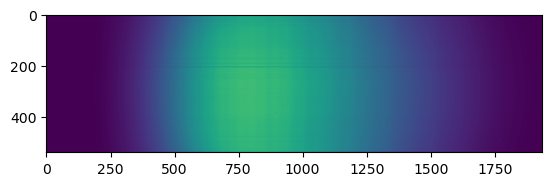

In [115]:
base_folder = r'.\Data\radiometric'
file_list = glob.glob(os.path.join(base_folder, '*'))

samples = 1
bands = 1936
datacube = np.fromfile(file_list[0], dtype='uint16') #(exposures[9]/1000) # divided by exposure time
datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1] # remove edges
datacube = datacube.flatten()


Xn = np.zeros_like(datacube)
Xn[0] = datacube[0] - datacube[1]
for i in range(len(datacube)):
    if i>0:
        Xn[i] = datacube[i] - datacube[i-1]

SNR = np.mean(datacube**2) / np.mean(Xn**2)
print(f'SNR: {SNR}dB')

datacube = datacube.reshape((-1, samples, bands))[:,0,::-1]
plt.imshow(datacube)

# FWHM

In [116]:
base_folder = './Data/dark-images'
file_name1 =  '1727161965.569_00000_e300.0016_g000_1936x1216.bip'
file_path1 = os.path.join(base_folder, file_name1)

datacube1 = np.fromfile(file_path1, dtype='uint16')

slit_widt = 25*10^(-6)
focal_lenght = 30 *10^(-3)
grooves = 600
order = 3
alpha = 20

def theo_fwhm_cal(a,w,alpha,n,f):
    list_fwhm = []
    for i in range(1,n+1):
        fwhm = ((a*np.cos(alpha))/(i*f))*w
        list_fwhm.append(fwhm)
    return list_fwhm

def prac_fwhm_cal():
    return 0




##### MAIN FUNCTION CALLS ############
print(theo_fwhm_cal(grooves,slit_widt,alpha,order,focal_lenght))


[np.float64(206.86932242421454), np.float64(103.43466121210727), np.float64(68.95644080807152)]


## Imperical FWHM

[[  1.95 399.45]
 [  2.25 426.6 ]
 [  2.4  431.7 ]
 [  2.25 438.3 ]
 [  2.1  445.35]
 [  1.95 449.55]
 [  1.95 452.4 ]
 [  1.8  462.3 ]
 [  1.8  466.2 ]
 [  1.5  471.9 ]
 [  1.5  477.3 ]
 [  1.5  482.1 ]
 [  1.5  487.5 ]
 [  1.35 490.95]
 [  1.35 495.3 ]]


Text(0, 0.5, 'Peak FWHM [nm]')

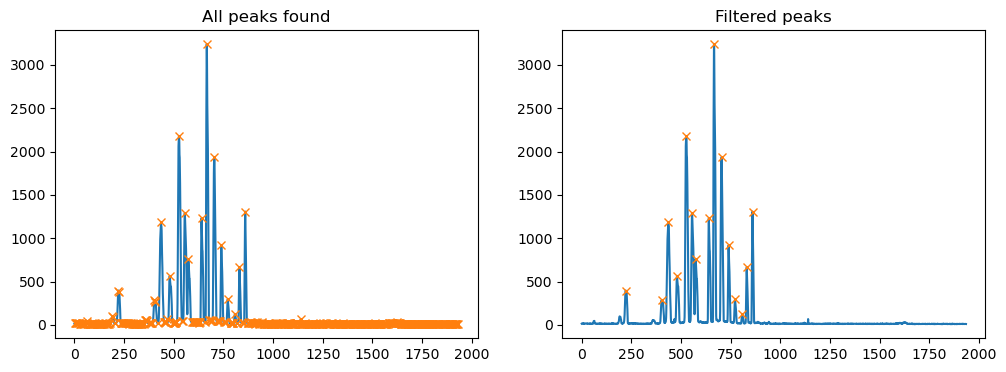

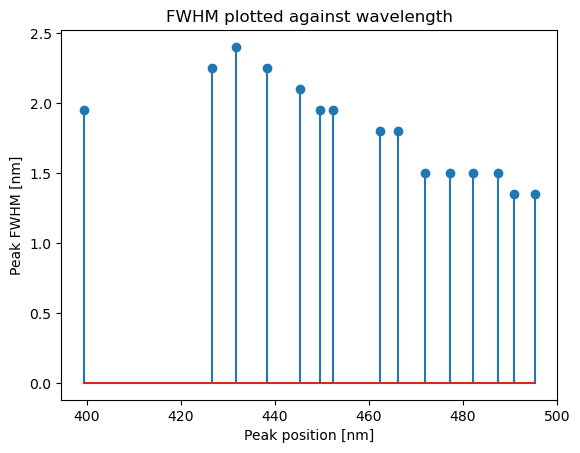

In [160]:
base_folder = './Data/Ar'
file_name =  '1727163191.770_00000_e999.8941_g008_1936x1216.bip'
file_path = os.path.join(base_folder, file_name)
# get datacube
datacube_ar = np.fromfile(file_path, dtype='uint16')
datacube_ar = datacube_ar.reshape((-1, samples, bands))[:,0,::-1]

# num_peaks = argon_wavelengths.shape[0]

peaks, _ = find_peaks(datacube_ar[600]) # 

# peaks = [peak for peak in peaks if datacube_ar[600][peak] > 100]
# filtered_peaks = [peak for peak in peaks if datacube_ar[600][peak] > 100]

filtered_peaks = []

for i in range(len(peaks)): 
    if datacube_ar[600][peaks[i]] > 100:  
        if i>0 and (peaks[i] - peaks[i-1]) > 5:
            filtered_peaks.append(peaks[i])


# Get half of max
# FWHM_x = [0]*len(filtered_peaks)
FWHM_x = np.zeros((len(filtered_peaks),2))
for i in range(len(filtered_peaks)):
    half_max = datacube_ar[600][filtered_peaks[i]]/2
    idx = filtered_peaks[i]
    j = 0
    while datacube_ar[600][idx+j] > half_max:
        j += 1
        right_width = idx + j
    j = 0 
    while datacube_ar[600][idx-j] > half_max:
        j += 1
        left_width = idx - j
    FWHM_x[i,0] = right_width - left_width
    FWHM_x[i,1] = idx
# FWHM_x = np.array([int(x) for x in FWHM_x])
# print(FWHM_x)

# convert to wavelength
FWHM = np.zeros_like(FWHM_x)
FWHM[:,0] =FWHM_x[:,0]*0.15
FWHM[:,1] =FWHM_x[:,1]*0.15 + 366.3

print(FWHM)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('All peaks found')
plt.plot(datacube_ar[600])#
plt.plot(peaks, datacube_ar[600][peaks], "x")
plt.subplot(1,2,2)
plt.title('Filtered peaks')
plt.plot(datacube_ar[600])#
plt.plot(filtered_peaks, datacube_ar[600][filtered_peaks], "x")

plt.figure()
plt.title('FWHM plotted against wavelength')
plt.stem(FWHM[:,1], FWHM[:,0])
plt.xlabel('Peak position [nm]')
plt.ylabel('Peak FWHM [nm]')


# peak_array = datacube_ar[600][peaks]

# peak_values = np.partition(peak_array, -num_peaks)[-num_peaks:]
# print(np.partition(peak_array, -num_peaks)[-num_peaks:])

# # for point in datacube_ar[600]: if point in peak_values: print(point)
# final_points = []
# for i in range(len(datacube_ar[600])):
#     if datacube_ar[600][i] in peak_values and i in peaks: 
#         final_points.append(i)

# # del final_points[4]

# plt.plot(final_points, datacube_ar[600][final_points], "x")

# plt.figure()
# plt.scatter(final_points, argon_wavelengths)


In [157]:
np.min(FWHM[:,0]), np.max(FWHM[:,0])

(np.float64(1.3499999999999999), np.float64(2.4))

# Radiometric Response

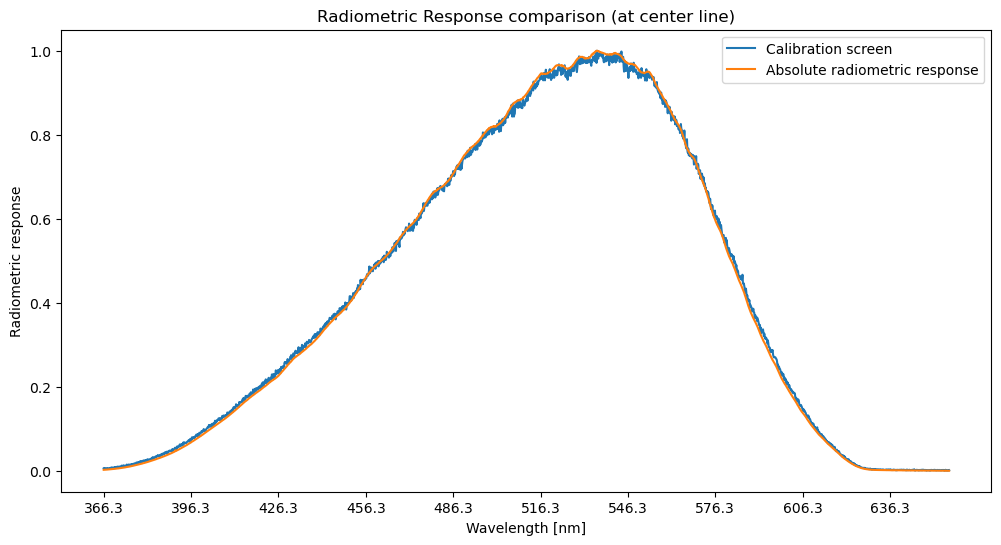

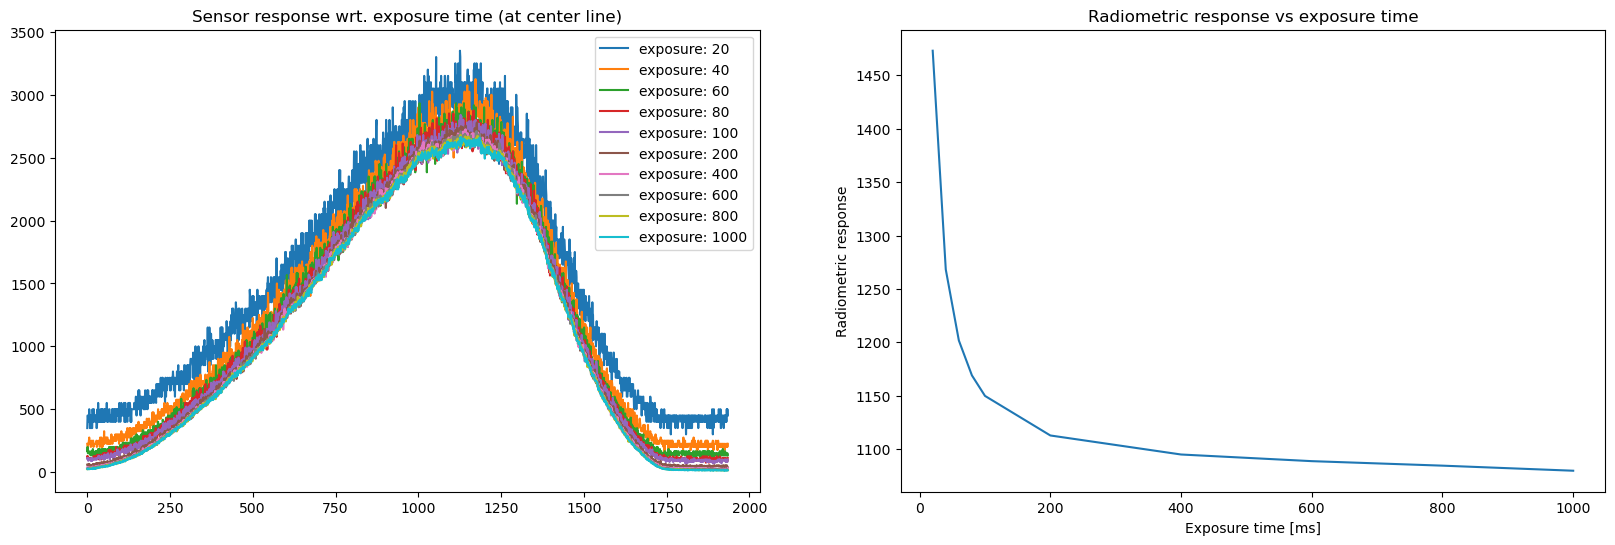

In [50]:
base_folder = r'.\Data\radiometric-verify'
file_list = glob.glob(os.path.join(base_folder, '*'))

samples = 1
bands = 1936
datacube = np.fromfile(file_list[0], dtype='uint16')
datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1]
avg_cube = np.zeros_like(datacube).astype(float) # init. empty empty average datacube

exposures = [20, 40, 60, 80, 100, 200, 400, 600, 800, 1000]

datacube_list = []
avg_datacube_list = []

for i in range(10):
    datacube = np.fromfile(file_list[i+1], dtype='uint16')
    datacube = datacube.reshape((-1, samples, bands))[edge1:edge2,0,::-1]
    avg_cube += 1/10 * datacube / (exposures[i]/1000)
    datacube_list.append(datacube[300] / (exposures[i]/1000))
    avg_datacube_list.append(np.mean(datacube, axis=None) / (exposures[i]/1000))
# avg_cube = avg_cube.reshape((-1, samples, bands))[:,0,::-1]

avg_L = K/avg_cube
img_L = K/datacube

# absolute radiometric response: 
abs_radiometric_response = np.mean(datacube, axis=0)

uncertainty = np.abs( (avg_L-img_L)/avg_L) # equation from lab doc. 

normalized_abs_radiometric_response = (abs_radiometric_response - np.min(abs_radiometric_response)) / (np.max(abs_radiometric_response) - np.min(abs_radiometric_response)) 
normalized_center = (datacube[300] - np.min(datacube[300])) / (np.max(datacube[300]) - np.min(datacube[300])) 

x_ticks = np.arange(0, bands, 200)  # Custom tick locations
x_labels = 366.3 + x_ticks * 0.15  # Custom tick labels


plt.figure(figsize=(12,6))
plt.plot(normalized_center)
plt.plot(normalized_abs_radiometric_response)
plt.title('Radiometric Response comparison (at center line)')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Radiometric response')
plt.xticks(ticks=x_ticks, labels=np.round(x_labels, 2))
plt.legend(['Calibration screen', 'Absolute radiometric response'])
plt.show()

lgd = []
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Sensor response wrt. exposure time (at center line)')
for i in range(len(datacube_list)):
    plt.plot(datacube_list[i])
    lgd.append(f'exposure: {exposures[i]}')
plt.legend(lgd) 


# plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title('Radiometric response vs exposure time')
plt.xlabel('Exposure time [ms]')
plt.ylabel('Radiometric response')
plt.plot(exposures, avg_datacube_list)